In [7]:
#python libraries
import os
import math
import time
from datetime import datetime
from math import sqrt
import random as rn

#other ML libraries
import numpy as np
import pandas as pd

#ploting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline
#Plot color palette & grid background
#mpl.rcParams['axes.prop_cycle'] =  mpl.cycler(color=[ "k", "r", "#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4",  "#00bfa0", "#b3d4ff"]) 
#plt.style.use('ggplot')


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error


In [9]:
#Import Disruptive & Netatmo Sensor Data

# assign variables
directory = './data/smarthouse/'
sensor_data = pd.DataFrame()
sensor_data['timestamp'] = None #in order to merge based on it 

types = ["_water", "_proximity", "_proximity", "_temperature", "_temperature", "_temperature", "_water", "_temperature", "_temperature", "_temperature", "", "_proximity", "_temperature",
         "_temperature", "_temperature", "_temperature", "_temperature", "_temperature", "_proximity",  "_temperature", "", "", "_temperature", "_temperature", "_proximity", "_temperature", "_water"]



# iterate over files in that directory and concat into 1 big dataframe based on timestamps
for filename, i in zip(os.listdir(directory), range(len(types)+1)):
    f = os.path.join(directory, filename)
    print(filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f, types[i-1])
        
        df = pd.read_csv(f)
        df = df.rename(columns={df.columns[1] : df.columns[1] + types[i-1]})
        df['timestamp'] = pd.to_datetime(df['timestamp'],  utc=True) #.dt.tz_localize("UTC").dt.tz_convert('Europe/Rome') #set timezone correctly if not correct in local time
        
        #For Water Detection:
        #NOT_PRESENT == No water detected = 0
        #PRESENT     == water detected    = 1

        #For Proximity Sensors: - this is because sensor changes state based on if it detects objects in front of it
        #NOT_PRESENT == DOOR IS OPEN     = 0
        #PRESENT     == DOOR IS CLOSED   = 1
        if types[i-1] == "_proximity" or types[i-1] == "_water":
            df.replace(['NOT_PRESENT', 'PRESENT'],[0, 1], inplace=True)

        df  = df.resample('5T', on='timestamp').mean().interpolate()                   #resample to managable timestamps by taking mean of 5 minute slots and linear interpolating NaNs, i.e. 5, 10, 15, 20 minutes etc..
        
        sensor_data = pd.merge(sensor_data, df.drop(columns=df.columns[0]), on='timestamp', how="outer") 

        
        #print(f, types[i-1], sensor_data.iloc[len(sensor_data)-400:,:].query("timestamp == timestamp.min()"))
        

sensor_data = sensor_data.set_index("timestamp")


#Postprocesing the data in order to get rid of the NaN Values


#bfill and ffill to both populate NaN values of the proximity such that we fill all NaNs with the earliest valid value then we front fill the remaining last values
sensor_data.loc[:, sensor_data.columns.str.endswith('proximity')] = sensor_data.loc[:, sensor_data.columns.str.endswith('proximity')].bfill().ffill()
sensor_data.loc[:, sensor_data.columns.str.endswith('water')] = sensor_data.loc[:, sensor_data.columns.str.endswith('water')].bfill().ffill()


#round back to int
sensor_data.loc[:, sensor_data.columns.str.endswith('proximity')] = sensor_data.loc[:, sensor_data.columns.str.endswith('proximity')].round().astype(int)
sensor_data.loc[:, sensor_data.columns.str.endswith('water')] = sensor_data.loc[:, sensor_data.columns.str.endswith('water')].round().astype(int)



#linearly interpolate temperature and humidity values:
sensor_data.loc[:, sensor_data.columns.str.endswith('temperature')]  = sensor_data.loc[:, sensor_data.columns.str.endswith('temperature')].interpolate()
sensor_data.loc[:, sensor_data.columns.str.endswith('humidity')]  = sensor_data.loc[:, sensor_data.columns.str.endswith('humidity')].interpolate()


#bfill the humidity and temperature sensors
sensor_data = sensor_data.bfill().ffill()

#or just drop na rows
#sensor_data = sensor_data.iloc[:len(sensor_data)-300,:].copy() #removing stationary values from end
#sensor_data = sensor_data.iloc[253:,:].copy() #removing stationary values from start (due to not all sensors not being online yet in very start)

sensor_data

#round back to int
sensor_data.loc[:, sensor_data.columns.str.endswith('proximity')] = sensor_data.loc[:, sensor_data.columns.str.endswith('proximity')].round().astype(int)
sensor_data.loc[:, sensor_data.columns.str.endswith('water')] = sensor_data.loc[:, sensor_data.columns.str.endswith('water')].round().astype(int)



#linearly interpolate temperature and humidity values:
sensor_data.loc[:, sensor_data.columns.str.endswith('temperature')]  = sensor_data.loc[:, sensor_data.columns.str.endswith('temperature')].interpolate()
sensor_data.loc[:, sensor_data.columns.str.endswith('humidity')]  = sensor_data.loc[:, sensor_data.columns.str.endswith('humidity')].interpolate()


#bfill the humidity and temperature sensors
sensor_data = sensor_data.bfill().ffill()

#or just drop na rows
#sensor_data = sensor_data.iloc[:len(sensor_data)-300,:].copy() #removing stationary values from end
#sensor_data = sensor_data.iloc[253:,:].copy() #removing stationary values from start (due to not all sensors not being online yet in very start)

sensor_data

0BathroomWater.csv
./data/smarthouse/0BathroomWater.csv _water
0BDoor.csv
./data/smarthouse/0BDoor.csv _water
0BGuestDoor.csv
./data/smarthouse/0BGuestDoor.csv _proximity
0BRoom.csv
./data/smarthouse/0BRoom.csv _proximity
0BTCeiling.csv
./data/smarthouse/0BTCeiling.csv _temperature
0BTFloor.csv
./data/smarthouse/0BTFloor.csv _temperature
1BathRoomWatet.csv
./data/smarthouse/1BathRoomWatet.csv _temperature
1Entrance1.csv
./data/smarthouse/1Entrance1.csv _water


C:\Users\adil\AppData\Local\Temp\ipykernel_9592\575772665.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df  = df.resample('5T', on='timestamp').mean().interpolate()                   #resample to managable timestamps by taking mean of 5 minute slots and linear interpolating NaNs, i.e. 5, 10, 15, 20 minutes etc..


1Entrance2.csv
./data/smarthouse/1Entrance2.csv _temperature
1GuestRoom.csv
./data/smarthouse/1GuestRoom.csv _temperature
1MainBRHum.csv
./data/smarthouse/1MainBRHum.csv _temperature
1MainDoor.csv
./data/smarthouse/1MainDoor.csv 
1MainRoom.csv
./data/smarthouse/1MainRoom.csv _proximity


C:\Users\adil\AppData\Local\Temp\ipykernel_9592\575772665.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df  = df.resample('5T', on='timestamp').mean().interpolate()                   #resample to managable timestamps by taking mean of 5 minute slots and linear interpolating NaNs, i.e. 5, 10, 15, 20 minutes etc..


1OutdoorEntrance.csv
./data/smarthouse/1OutdoorEntrance.csv _temperature
1Stair bottom.csv
./data/smarthouse/1Stair bottom.csv _temperature
2BalconyEntrance.csv
./data/smarthouse/2BalconyEntrance.csv _temperature
2Cooking.csv
./data/smarthouse/2Cooking.csv _temperature
2Fireplace.csv
./data/smarthouse/2Fireplace.csv _temperature
2FirePlaceDoor.csv
./data/smarthouse/2FirePlaceDoor.csv _temperature
2LivingRoomCenter.csv
./data/smarthouse/2LivingRoomCenter.csv _proximity


C:\Users\adil\AppData\Local\Temp\ipykernel_9592\575772665.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df  = df.resample('5T', on='timestamp').mean().interpolate()                   #resample to managable timestamps by taking mean of 5 minute slots and linear interpolating NaNs, i.e. 5, 10, 15, 20 minutes etc..


2LivingRoomCenterHumidity.csv
./data/smarthouse/2LivingRoomCenterHumidity.csv _temperature
2LivingRoomHumidifier.csv
./data/smarthouse/2LivingRoomHumidifier.csv 
2LRWindow.csv
./data/smarthouse/2LRWindow.csv 
2OfficeDesk.csv
./data/smarthouse/2OfficeDesk.csv _temperature
2OfficeDoor.csv
./data/smarthouse/2OfficeDoor.csv _temperature
2Stair.csv
./data/smarthouse/2Stair.csv _proximity


C:\Users\adil\AppData\Local\Temp\ipykernel_9592\575772665.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df  = df.resample('5T', on='timestamp').mean().interpolate()                   #resample to managable timestamps by taking mean of 5 minute slots and linear interpolating NaNs, i.e. 5, 10, 15, 20 minutes etc..


KitchenSinkWater.csv
./data/smarthouse/KitchenSinkWater.csv _temperature


C:\Users\adil\AppData\Local\Temp\ipykernel_9592\575772665.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df  = df.resample('5T', on='timestamp').mean().interpolate()                   #resample to managable timestamps by taking mean of 5 minute slots and linear interpolating NaNs, i.e. 5, 10, 15, 20 minutes etc..


,0BathroomWater_water,0BDoor_water,0BGuestDoor_proximity,0BRoom_proximity,0BTCeiling_temperature,0BTFloor_temperature,1Entrance1_water,1Entrance2_temperature,1GuestRoom_temperature,1MainBRHum_temperature_temperature,...,2Cooking_temperature,2Fireplace_temperature,2LivingRoomCenter_proximity,2LivingRoomCenterHumidity_temperature_temperature,2LivingRoomCenterHumidity_humidity,2LivingRoomHumidifier_temperature,2LivingRoomHumidifier_humidity,2LRWindow,2OfficeDesk_temperature,2Stair_proximity
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-07 22:15:00+00:00,0.0,0.0,1.0,18.0,19.15,19.633333,21.0,20.350000,16.712500,17.066667,...,19.300000,20.587500,20.0,19.483333,25.0,20.100000,25.0,19.40,23.900,20.0
2022-01-07 22:20:00+00:00,0.0,0.0,1.0,18.0,19.10,19.616667,21.0,20.300000,16.725000,17.200000,...,19.216667,20.550000,19.0,19.450000,25.0,20.050000,25.0,19.35,23.700,20.0
2022-01-07 22:25:00+00:00,0.0,0.0,1.0,18.0,19.15,19.600000,21.0,20.400000,16.737500,16.983333,...,19.133333,20.433333,19.0,19.400000,25.0,20.000000,25.0,19.35,23.150,20.0
2022-01-07 22:30:00+00:00,0.0,1.0,1.0,18.0,19.20,19.616667,21.0,20.400000,16.750000,16.766667,...,19.050000,20.316667,20.0,19.350000,25.0,19.933333,25.0,19.35,22.400,20.0
2022-01-07 22:35:00+00:00,0.0,1.0,1.0,18.0,19.20,19.633333,21.0,20.600000,16.766667,16.550000,...,19.025000,20.200000,19.0,19.300000,25.0,19.866667,25.0,19.25,21.600,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 19:00:00+00:00,0.0,0.0,1.0,21.0,19.75,18.900000,21.0,20.500164,19.750000,19.083333,...,23.400000,22.700000,22.0,22.500000,44.0,22.650000,43.0,22.55,21.750,21.0
2022-01-07 19:50:00+00:00,0.0,0.0,1.0,21.0,18.65,19.200000,21.0,20.500000,18.000000,17.666667,...,22.150000,23.150000,21.0,21.900000,35.0,22.650000,43.0,20.95,19.800,21.0
2022-01-07 19:55:00+00:00,0.0,0.0,1.0,21.0,18.70,19.500000,21.0,20.525000,16.250000,16.250000,...,20.900000,23.600000,21.0,21.300000,26.0,22.650000,43.0,20.95,19.750,21.0


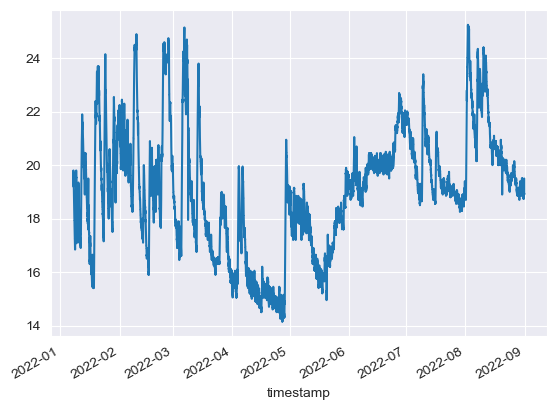

In [10]:
sensor_data['0BTFloor_temperature'].plot()
plt.show()

In [6]:
sensor_data.shape

(67653, 0)